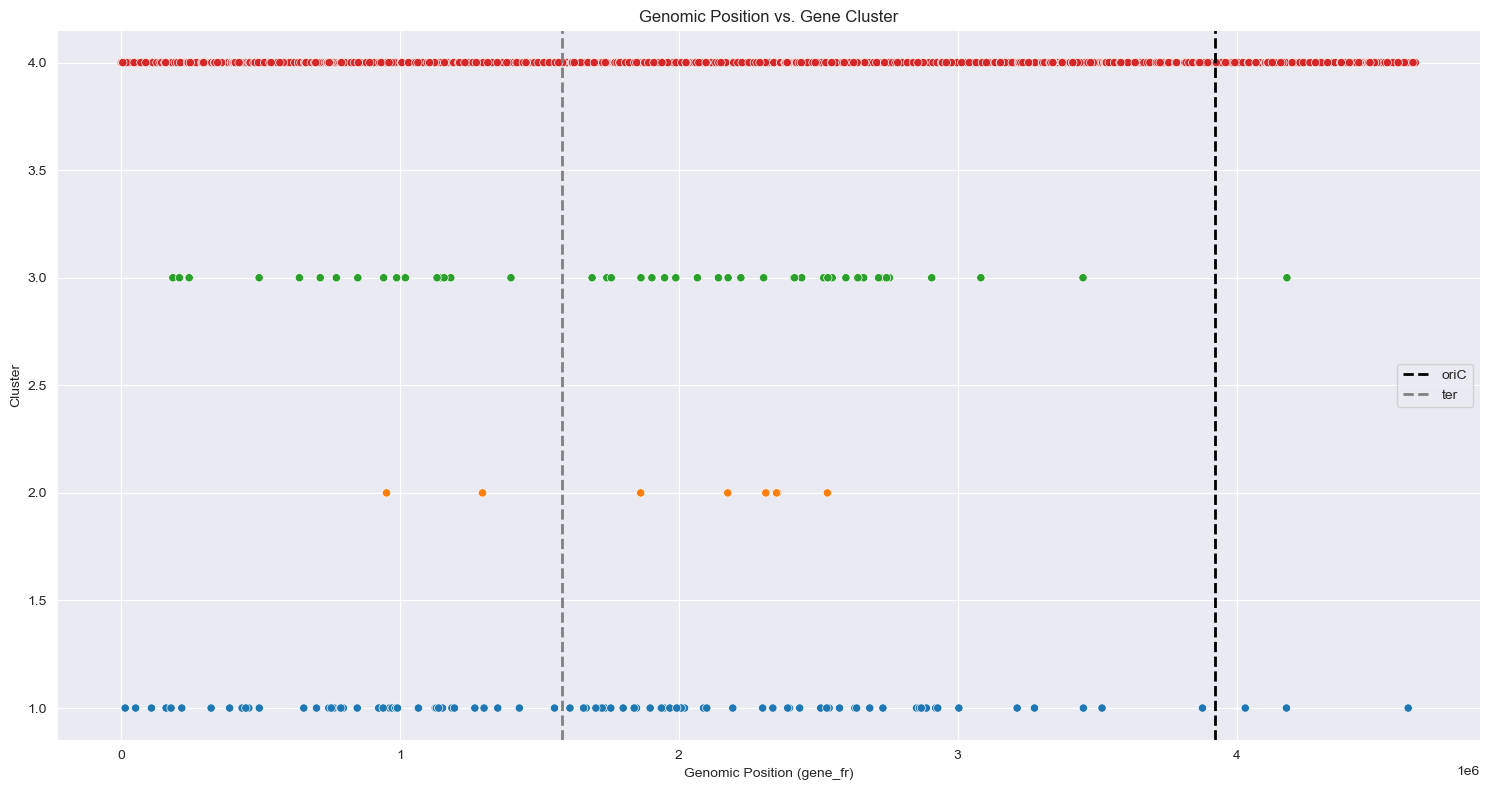

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the gene annotation data
gene_annotation_path = r'X:\danielda\analysis\zp_late_exp_100x_010724\analysis\cell_cycle\ASM584v2.genes_info.txt'
gene_annotation_df = pd.read_csv(gene_annotation_path, sep='\t')


# Load the normalized matrix with cluster assignments
normalized_matrix_path = r'C:\Users\yedidyab\Downloads\cluster_no_scale_by_cluster_0_5k_no_clean_subtraced_no_rat\clustered_genes.csv'
normalized_matrix_clustered = pd.read_csv(normalized_matrix_path)

# Create a new column with cleaned gene names
# normalized_matrix_clustered['gene_name'] = normalized_matrix_clustered['gene'].str.extract(r'^(.*)_\d+$')[0]

# Merge the cluster data with the gene annotation data
# Merge the cluster data with the gene annotation data
merged_df = pd.merge(normalized_matrix_clustered, gene_annotation_df, left_on='gene', right_on='gene_name')
merged_df.loc[merged_df['cluster'] == 0, 'cluster'] = 4

# Plot the relationship between genomic position and cluster
plt.figure(figsize=(15, 8))
sns.scatterplot(data=merged_df, x='gene_fr', y='cluster', hue='cluster', palette='tab10', legend=False)

# Mark oriC and ter positions
plt.axvline(x=3923766, color='black', linestyle='--', linewidth=2, label='oriC')
plt.axvline(x=1580000, color='gray', linestyle='--', linewidth=2, label='ter')

plt.title('Genomic Position vs. Gene Cluster')
plt.xlabel('Genomic Position (gene_fr)')
plt.ylabel('Cluster')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optionally, save the merged data to a file
# merged_df.to_csv(rf'{main_dir}/analysis/cell_cycle/merged_cluster_gene_positions.csv', index=False)


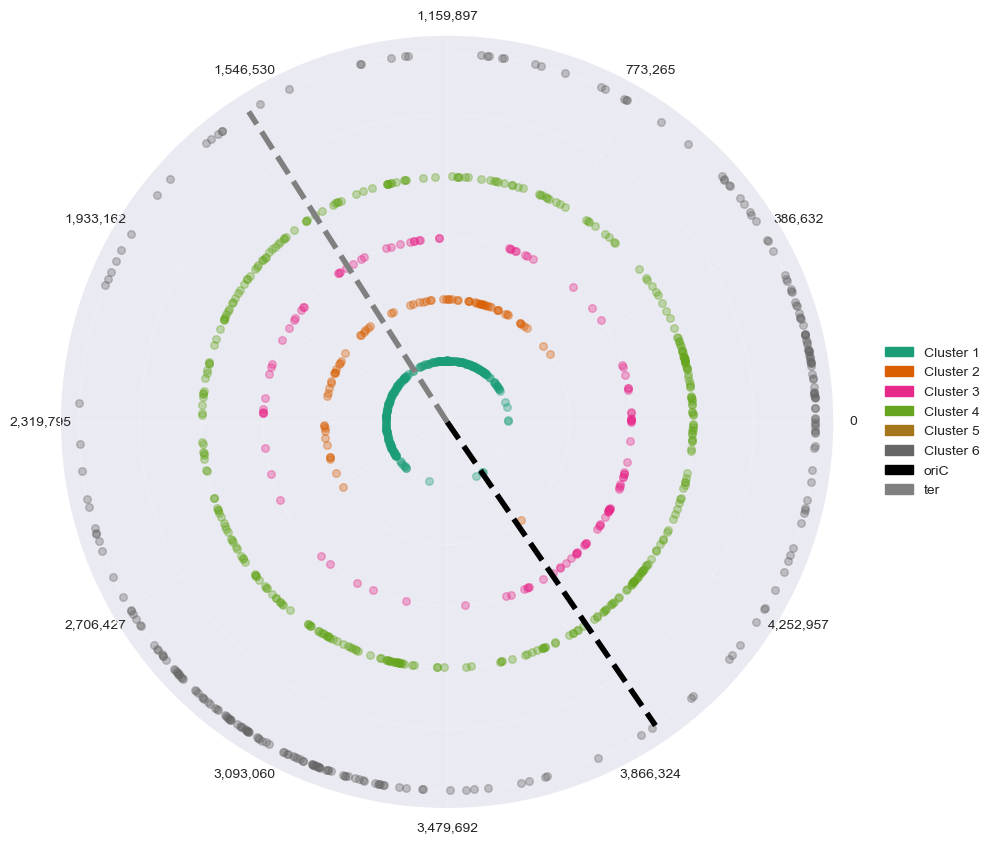

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Load the gene annotation data
gene_annotation_path = r'X:\danielda\analysis\zp_late_exp_100x_010724\analysis\cell_cycle\ASM584v2.genes_info.txt'
gene_annotation_df = pd.read_csv(gene_annotation_path, sep='\t')

# Load the normalized matrix with cluster assignments
normalized_matrix_path = r'C:\Users\yedidyab\Downloads\\\\\\\cluster_no_scale_by_cluster_0_5k_over_1_mean_rat_v3\clustered_genes.csv'
normalized_matrix_clustered = pd.read_csv(normalized_matrix_path)

# Create a new column with cleaned gene names
# normalized_matrix_clustered['gene_name'] = normalized_matrix_clustered['gene'].str.extract(r'^(.*)_\d+$')[0]

# Merge the cluster data with the gene annotation data
merged_df = pd.merge(normalized_matrix_clustered, gene_annotation_df, left_on='gene', right_on='gene_name')
# merged_df.loc[merged_df['cluster'] == 5, 'cluster'] = 3
# merged_df.loc[merged_df['cluster'] == 3, 'cluster'] = 6
# merged_df.loc[merged_df['cluster'] == 4, 'cluster'] = 3
# merged_df.loc[merged_df['cluster'] == 6, 'cluster'] = 4


# Define the positions for oriC and ter
oriC_position = 3923766
ter_position = 1580000

# Convert gene_fr to radians
genome_length = merged_df['gene_fr'].max()# + 186000
merged_df['angle'] = 2 * np.pi * merged_df['gene_fr'] / genome_length

cluster_colors = {
    1: [0.10588235, 0.61960784, 0.46666667, 1.],  # Replace with the actual RGB values
    2: [0.85098039, 0.37254902, 0.00784314, 1.        ],  # Replace with the actual RGB values
    3: [0.90588235, 0.16078431, 0.54117647, 1.        ],  # Replace with the actual RGB values
    4: [0.4,        0.65098039, 0.11764706, 1.        ],  # Replace with the actual RGB values
    5: [0.65098039, 0.4627451,  0.11372549, 1.        ],
    6: [0.4, 0.4, 0.4, 1. ]
}
# Cluster 1: Color code [0.10588235 0.61960784 0.46666667 1.        ]
# Cluster 2: Color code [0.85098039 0.37254902 0.00784314 1.        ]
# Cluster 3: Color code [0.90588235 0.16078431 0.54117647 1.        ]
# Cluster 4: Color code [0.4        0.65098039 0.11764706 1.        ]
# Cluster 5: Color code [0.65098039 0.4627451  0.11372549 1.        ]
# Cluster 6: Color code [0.4 0.4 0.4 1. ]
# Plotting
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Scatter plot of clusters
for cluster, color in cluster_colors.items():
    cluster_data = merged_df[merged_df['cluster'] == cluster]
    ax.scatter(cluster_data['angle'], cluster_data['cluster'], c=[color], label=f'Cluster {cluster}', s=30, alpha=0.35)

# Adding oriC and ter
ax.plot([2 * np.pi * oriC_position / genome_length] * 2, [0, merged_df['cluster'].max()], color='black', linestyle='--', linewidth=4, label='oriC')
ax.plot([2 * np.pi * ter_position / genome_length] * 2, [0, merged_df['cluster'].max()], color='gray', linestyle='--', linewidth=4, label='ter')

# Add custom legend
legend_elements = [Patch(facecolor=color, edgecolor=color, label=f'Cluster {cluster}') for cluster, color in cluster_colors.items()]
legend_elements.append(Patch(facecolor='black', edgecolor='black', label='oriC'))
legend_elements.append(Patch(facecolor='gray', edgecolor='gray', label='ter'))
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False)

# Remove grid and labels
ax.grid(True, alpha=0.2)
ax.set_yticklabels([])
ax.set_xticklabels([])

# Add tick marks and labels
tick_angles = np.linspace(0, 2 * np.pi, num=12, endpoint=False)
tick_labels = [f'{int(angle * genome_length / (2 * np.pi)):,}' for angle in tick_angles]
ax.set_xticks(tick_angles)
ax.set_xticklabels(tick_labels)
plt.tight_layout()

# plt.title('Genomic Position vs. Gene Cluster (Circular Plot)')
plt.savefig(r'C:\Users\yedidyab\Downloads\\\\\\cluster_no_scale_by_cluster_0_5k_over_1_mean_rat_v3\clustered_genes1.png', dpi=300)

# Optionally, save the merged data to a file
# merged_df.to_csv(rf'{main_dir}/analysis/cell_cycle/merged_cluster_gene_positions.csv', index=False)


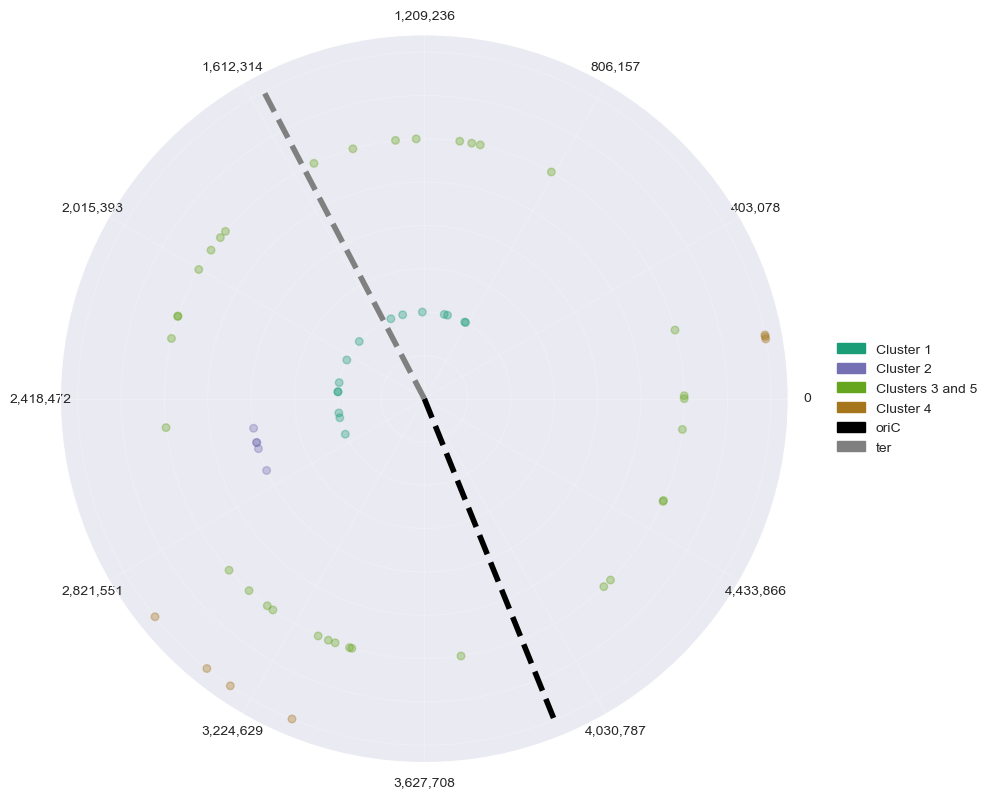

In [67]:
genome_length += 186
# Plotting
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Scatter plot for all clusters, with clusters 3 and 5 plotted together
for cluster in cluster_colors.keys():
    if cluster in [3, 5]:
        # Combine clusters 3 and 5 on the same circle
        combined_cluster = 3  # Just a label to identify the combined plot
        cluster_data = merged_df[merged_df['cluster'].isin([3, 5])]
        ax.scatter(cluster_data['angle'], [combined_cluster] * len(cluster_data), c=[cluster_colors[cluster]] * len(cluster_data), label=f'Cluster 3 and 5', s=30, alpha=0.35)
    else:
        # Plot other clusters as they are
        cluster_data = merged_df[merged_df['cluster'] == cluster]
        ax.scatter(cluster_data['angle'], cluster_data['cluster'], c=[cluster_colors[cluster]] * len(cluster_data), label=f'Cluster {cluster}', s=30, alpha=0.35)

# Adding oriC and ter
ax.plot([2 * np.pi * oriC_position / genome_length] * 2, [0, merged_df['cluster'].max()], color='black', linestyle='--', linewidth=4, label='oriC')
ax.plot([2 * np.pi * ter_position / genome_length] * 2, [0, merged_df['cluster'].max()], color='gray', linestyle='--', linewidth=4, label='ter')

# Add custom legend
legend_elements = [Patch(facecolor=cluster_colors[cluster], edgecolor=cluster_colors[cluster], label=f'Cluster {cluster}' if cluster not in [3, 5] else 'Clusters 3 and 5') for cluster in cluster_colors.keys()]
legend_elements.append(Patch(facecolor='black', edgecolor='black', label='oriC'))
legend_elements.append(Patch(facecolor='gray', edgecolor='gray', label='ter'))
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False)

# Remove grid and labels
ax.grid(True, alpha=0.2)
ax.set_yticklabels([])
ax.set_xticklabels([])

# Add tick marks and labels
tick_angles = np.linspace(0, 2 * np.pi, num=12, endpoint=False)
tick_labels = [f'{int(angle * genome_length / (2 * np.pi)):,}' for angle in tick_angles]
ax.set_xticks(tick_angles)
ax.set_xticklabels(tick_labels)
plt.tight_layout()

# Save the plot
plt.savefig(r'C:\Users\yedidyab\Downloads\\cluster_no_scale_by_cluster_0_5k_rat_no_filt\clustered_genes_combined_3_5.png', dpi=300)


In [52]:
merged_df.loc[merged_df['cluster'] == 5, 'cluster']

2     5
4     5
6     5
7     5
10    5
15    5
20    5
25    5
31    5
33    5
35    5
39    5
41    5
44    5
45    5
46    5
48    5
49    5
60    5
Name: cluster, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

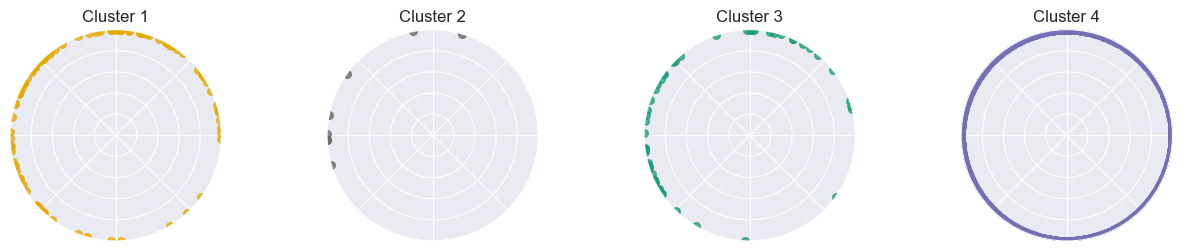

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch


# Convert gene_fr to radians
genome_length = merged_df['gene_fr'].max()
merged_df['angle'] = 2 * np.pi * merged_df['gene_fr'] / genome_length



# Create subplots for each cluster
fig, axs = plt.subplots(1, len(cluster_colors), figsize=(15, 3), subplot_kw={'projection': 'polar'})
fig.subplots_adjust(wspace=0.5)

# Constant radius for all points
fixed_radius = 1

# Plot each cluster in its own subplot
for idx, (cluster, ax) in enumerate(zip(cluster_colors, axs.flatten()), start=1):
    cluster_data = merged_df[merged_df['cluster'] == cluster]
    ax.scatter(cluster_data['angle'], np.full_like(cluster_data['angle'], fixed_radius), c=cluster_colors[cluster], label=f'Cluster {cluster}', s=30, alpha=0.75)
    ax.set_title(f'Cluster {cluster}')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_ylim(0, 1)  # Fix the radial limit to just one level

# Optionally save the figure
# plt.savefig(r'V:\danielda\analysis\zp_auto_080524_late_exp_100x\analysis\cell_cycle\cluster_plots.png')

plt.show()


In [24]:
merged_df[merged_df.cluster == 0]

,Unnamed: 0,gene,cluster,contig,gene_type,locus_tag,gene_name,gene_fr,gene_to,gene_st,product,angle
0,7,fimA,0,NC_000913.3,CDS,b4314,fimA,4543115,4543663,+,type_1_fimbriae_major_subunit,6.150741
1,8,gadB,0,NC_000913.3,CDS,b1493,gadB,1570645,1572045,-,glutamate_decarboxylase_B,2.126433
3,10,cheA,0,NC_000913.3,CDS,b1888,cheA,1973360,1975324,-,chemotaxis_protein_CheA,2.671653
8,15,carA,0,NC_000913.3,CDS,b0032,carA,29651,30799,+,carbamoyl-phosphate_synthetase_small_subunit,0.040143
11,18,ppdB,0,NC_000913.3,CDS,b2825,ppdB,2963153,2963716,-,prepilin-type_N-terminal_cleavage/methylation_...,4.011694
...,...,...,...,...,...,...,...,...,...,...,...,...
2322,2331,alaS,0,NC_000913.3,CDS,b2697,alaS,2819381,2822011,-,alanine--tRNA_ligase/DNA-binding_transcription...,3.817047
2323,2332,symE,0,NC_000913.3,CDS,b4347,symE,4579499,4579840,-,nucleoid-associated_protein_SymE,6.200000
2324,2333,ascB,0,NC_000913.3,CDS,b2716,ascB,2840990,2842414,+,6-phospho-beta-glucosidase_AscB,3.846302
2325,2334,yciW,0,NC_000913.3,CDS,b1287,yciW,1348980,1350107,-,putative_peroxidase_YciW,1.826330


In [41]:
25*12

300

Year 1: House Value: 2,040,000.00 NIS, Accumulated Rent Income: 0.00 NIS, House Net Worth: 575,010.63 NIS, Savings Net Worth: 535,000.00 NIS, Mortgage Balance: 1,464,989.37 NIS
Year 2: House Value: 2,080,800.00 NIS, Accumulated Rent Income: 0.00 NIS, House Net Worth: 652,221.69 NIS, Savings Net Worth: 572,450.00 NIS, Mortgage Balance: 1,428,578.31 NIS
Year 3: House Value: 2,122,416.00 NIS, Accumulated Rent Income: 0.00 NIS, House Net Worth: 731,705.19 NIS, Savings Net Worth: 612,521.50 NIS, Mortgage Balance: 1,390,710.81 NIS
Year 4: House Value: 2,164,864.32 NIS, Accumulated Rent Income: 0.00 NIS, House Net Worth: 813,535.71 NIS, Savings Net Worth: 655,398.01 NIS, Mortgage Balance: 1,351,328.61 NIS
Year 5: House Value: 2,208,161.61 NIS, Accumulated Rent Income: 0.00 NIS, House Net Worth: 897,790.48 NIS, Savings Net Worth: 701,275.87 NIS, Mortgage Balance: 1,310,371.13 NIS
Year 6: House Value: 2,252,324.84 NIS, Accumulated Rent Income: 0.00 NIS, House Net Worth: 984,549.50 NIS, Savings 

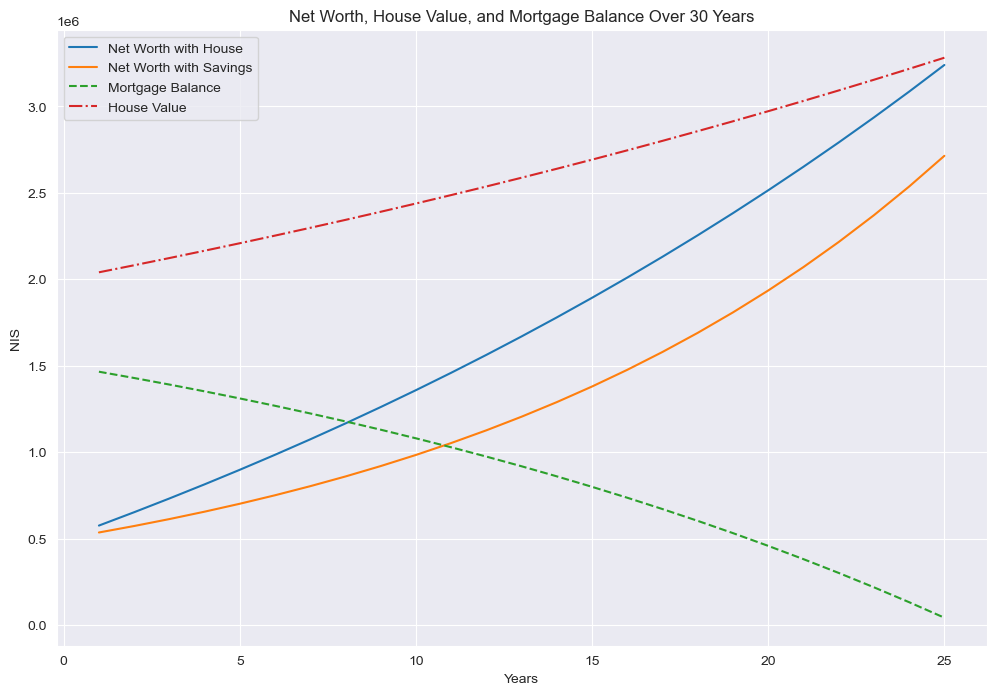

In [73]:
import numpy as np
import numpy_financial as npf  # Import numpy-financial
import matplotlib.pyplot as plt



# Parameters (change these to simulate different scenarios)
initial_savings = 500_000  # Initial savings in NIS
house_price = 2_000_000  # House price in NIS
mortgage_amount = 1_500_000  # Mortgage amount in NIS
mortgage_interest_rate = 0.04  # Mortgage interest rate (4%)
mortgage_years = 25  # Mortgage duration in years
rent_yield = 0.9  # Rent yield (2.5%)
house_price_growth = 0.02  # Annual house price growth (2%)
savings_interest_rate = 0.07  # Savings interest rate (7%)
years_to_simulate = 25  # Number of years to simulate

# Calculate the monthly mortgage payment
monthly_interest_rate = mortgage_interest_rate / 12
num_payments = mortgage_years * 12
monthly_mortgage_payment = npf.pmt(monthly_interest_rate, num_payments, -mortgage_amount)

# Initialize variables for the simulation
house_value = house_price
savings_balance = initial_savings
mortgage_balance = mortgage_amount
total_mortgage_paid = 0  # To track the total mortgage payments
accumulated_rent_income = 0  # To track the accumulated rent income

net_worth_house = []
net_worth_savings = []
mortgage_balances = []
house_values = []  # To track the value of the house over time

# Simulate each year
for year in range(1, years_to_simulate + 1):
    # House scenario
    house_value *= (1 + house_price_growth)  # House value appreciation
    house_values.append(house_value)  # Track the house value over time
    annual_rent_income = house_value * rent_yield  # Rent income

    # Update mortgage balance correctly
    if mortgage_balance > 0:
        # Calculate annual mortgage payment (split into interest and principal)
        interest_paid = mortgage_balance * monthly_interest_rate * 12  # Interest portion for the year
        principal_paid = (monthly_mortgage_payment * 12) - interest_paid  # Principal portion for the year

        # Update mortgage balance
        mortgage_balance -= principal_paid
        mortgage_balance = max(mortgage_balance, 0)  # Ensure mortgage balance doesn't go below zero

        total_mortgage_paid += monthly_mortgage_payment * 12  # Accumulate the total mortgage payments

        # If mortgage is still being paid, put rent income into savings
        # savings_balance += annual_rent_income

    else:
        # If mortgage is paid off, accumulate the rent income directly
        accumulated_rent_income += annual_rent_income
        accumulated_rent_income *= (1 + savings_interest_rate)

    # Track mortgage balance over time
    mortgage_balances.append(mortgage_balance)

    # Calculate net worth for house scenario
    net_worth_house.append(house_value - mortgage_balance + accumulated_rent_income)

    # Savings scenario
    savings_balance *= (1 + savings_interest_rate)  # Apply interest to savings
    net_worth_savings.append(savings_balance)

    # Output at each year (optional)
    print(f"Year {year}: House Value: {house_value:,.2f} NIS, Accumulated Rent Income: {accumulated_rent_income:,.2f} NIS, House Net Worth: {net_worth_house[-1]:,.2f} NIS, Savings Net Worth: {net_worth_savings[-1]:,.2f} NIS, Mortgage Balance: {mortgage_balance:,.2f} NIS")

# Total mortgage payments
print(f"\nTotal Mortgage Paid over {mortgage_years} years: {total_mortgage_paid:,.2f} NIS")

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1, years_to_simulate + 1), net_worth_house, label='Net Worth with House')
plt.plot(range(1, years_to_simulate + 1), net_worth_savings, label='Net Worth with Savings')
plt.plot(range(1, years_to_simulate + 1), mortgage_balances, label='Mortgage Balance', linestyle='--')
plt.plot(range(1, years_to_simulate + 1), house_values, label='House Value', linestyle='-.')
plt.title('Net Worth, House Value, and Mortgage Balance Over 30 Years')
plt.xlabel('Years')
plt.ylabel('NIS')
plt.legend()
plt.grid(True)
plt.savefig(r'C:\Users\yedidyab\Downloads\net.png', dpi=400)

plt.show()
